In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

In [65]:
GBvideo = pd.read_csv("GBvideos_col_centiment_analysis.csv", index_col = "video_id", error_bad_lines=False) #,
# GBvideo_1 = pd.read_csv("data_With_Cleaned_columns.csv", index_col = "video_id",  error_bad_lines=False)# , index_col = "video_id",
GBvideo['category_names'].unique()
# GBvideo.columns

/var/folders/f3/bn38wqx10x7_r1qpn23rqqdr0000gn/T/ipykernel_42596/2178122994.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  GBvideo = pd.read_csv("GBvideos_col_centiment_analysis.csv", index_col = "video_id", error_bad_lines=False) #,
/var/folders/f3/bn38wqx10x7_r1qpn23rqqdr0000gn/T/ipykernel_42596/2178122994.py:1: DtypeWarning: Columns (12,13,14,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  GBvideo = pd.read_csv("GBvideos_col_centiment_analysis.csv", index_col = "video_id", error_bad_lines=False) #,


array(['Howto  Style', 'Entertainment', 'Gaming', 'Music',
       'People  Blogs', nan, '0.0', 'Sports', '0.117', '0.167', '0.206',
       '0.124', 'Shows', '0.218', 'News  Politics', ' Film  Animation',
       'Comedy', 'Science  Technology', 'Pets  Animals', 'Education',
       'Autos  Vehicles', 'Travel  Events', 'Nonprofits  Activism'],
      dtype=object)

In [3]:
GBvideo['tags_words'] = GBvideo['tags'].apply(lambda n: len(str(n).split(' ')))
GBvideo['title_words'] = GBvideo['title'].apply(lambda n: len(str(n).split(' ')))

In [4]:
# GBvideo = GBvideo[["tags_words", "title_words", "category_names"]]
# GBvideo.shape 

In [5]:
df= GBvideo[["category_id", 
             "tags_words",
             "title_words",
             "views",
             "tag_length",
             "description_length",
             "title_length",
             "category_names_length",
             "channel_title_length",
             "Analysis_title",   
             "Analysis_tags",
             "Analysis_descrp"]]
df.shape

(39235, 12)

In [6]:
# df = pd.merge(GBvideo_U, GBvideo_U, on = "video_id")
# df

In [7]:
df.isna().sum()

category_id              206
tags_words                 0
title_words                0
views                    206
tag_length               319
description_length       931
title_length             319
category_names_length    319
channel_title_length     319
Analysis_title           432
Analysis_tags            432
Analysis_descrp          432
dtype: int64

In [8]:
newdf = df.dropna()
newdf.isna().sum()

category_id              0
tags_words               0
title_words              0
views                    0
tag_length               0
description_length       0
title_length             0
category_names_length    0
channel_title_length     0
Analysis_title           0
Analysis_tags            0
Analysis_descrp          0
dtype: int64

In [9]:
newdf.duplicated().sum()

174

In [10]:
newdf = newdf.drop_duplicates()
newdf

category_id  tags_words  title_words      views  tag_length  \
video_id                                                                   
Jw1Y-zhQURU         26.0          35            7  7224515.0       149.0   
Jw1Y-zhQURU         26.0          35            7  7563254.0       149.0   
Jw1Y-zhQURU         26.0          35            7  7727696.0       149.0   
Jw1Y-zhQURU         26.0          35            7  8041928.0       149.0   
Jw1Y-zhQURU         26.0          35            7  8151265.0       149.0   
...                  ...         ...          ...        ...         ...   
j1oMVG1ZMlA         29.0           1            7   115867.0         6.0   
j1oMVG1ZMlA         29.0           1            7   117365.0         6.0   
j1oMVG1ZMlA         29.0           1            7   120274.0         6.0   
j1oMVG1ZMlA         29.0           1            7   122357.0         6.0   
j1oMVG1ZMlA         29.0           1            7   121862.0         6.0   

             description_length  title_length category_names_length  \
video_id                                                              
Jw1Y-zhQURU               821.0          45.0                    13   
Jw1Y-zhQURU               821.0          45.0                    13   
Jw1Y-zhQURU               821.0          45.0                    13   
Jw1Y-zhQURU               821.0          45.0                    13   
Jw1Y-zhQURU               821.0          45.0                    13   
...                         ...           ...                   ...   
j1oMVG1ZMlA               296.0          36.0                    21   
j1oMVG1ZMlA               296.0          36.0                    21   
j1oMVG1ZMlA               296.0          36.0                    21   
j1oMVG1ZMlA               296.0          36.0                    21   
j1oMVG1ZMlA               296.0          36.0                    21   

             channel_title_length Analysis_title Analysis_tags Analysis_descrp  
video_id                                                                        
Jw1Y-zhQURU                  10.0        Neutral       Neutral        Positive  
Jw1Y-zhQURU                  10.0        Neutral       Neutral        Positive  
Jw1Y-zhQURU                  10.0        Neutral       Neutral        Positive  
Jw1Y-zhQURU                  10.0        Neutral       Neutral        Positive  
Jw1Y-zhQURU                  10.0        Neutral       Neutral        Positive  
...                           ...            ...           ...             ...  
j1oMVG1ZMlA                  19.0        Neutral       Neutral        Negative  
j1oMVG1ZMlA                  19.0        Neutral       Neutral        Negative  
j1oMVG1ZMlA                  19.0        Neutral       Neutral        Negative  
j1oMVG1ZMlA                  19.0        Neutral       Neutral        Negative  
j1oMVG1ZMlA                  19.0        Neutral       Neutral        Negative  

[38017 rows x 12 columns]

In [11]:
newdf.to_csv("GBvideo_cleaned.csv")

In [12]:
corr_mat = newdf.corr()
corr_mat

category_id  tags_words  title_words     views  \
category_id              1.000000    0.115591    -0.001146 -0.171563   
tags_words               0.115591    1.000000     0.186072 -0.025961   
title_words             -0.001146    0.186072     1.000000 -0.011496   
views                   -0.171563   -0.025961    -0.011496  1.000000   
tag_length               0.132946    0.972898     0.202285 -0.029266   
description_length       0.105700    0.297603     0.078626 -0.039097   
title_length             0.079568    0.211640     0.915793 -0.052017   
channel_title_length     0.047332   -0.014698    -0.051789 -0.028301   

                      tag_length  description_length  title_length  \
category_id             0.132946            0.105700      0.079568   
tags_words              0.972898            0.297603      0.211640   
title_words             0.202285            0.078626      0.915793   
views                  -0.029266           -0.039097     -0.052017   
tag_length              1.000000            0.309140      0.249639   
description_length      0.309140            1.000000      0.084578   
title_length            0.249639            0.084578      1.000000   
channel_title_length   -0.019995            0.035725     -0.010420   

                      channel_title_length  
category_id                       0.047332  
tags_words                       -0.014698  
title_words                      -0.051789  
views                            -0.028301  
tag_length                       -0.019995  
description_length                0.035725  
title_length                     -0.010420  
channel_title_length              1.000000

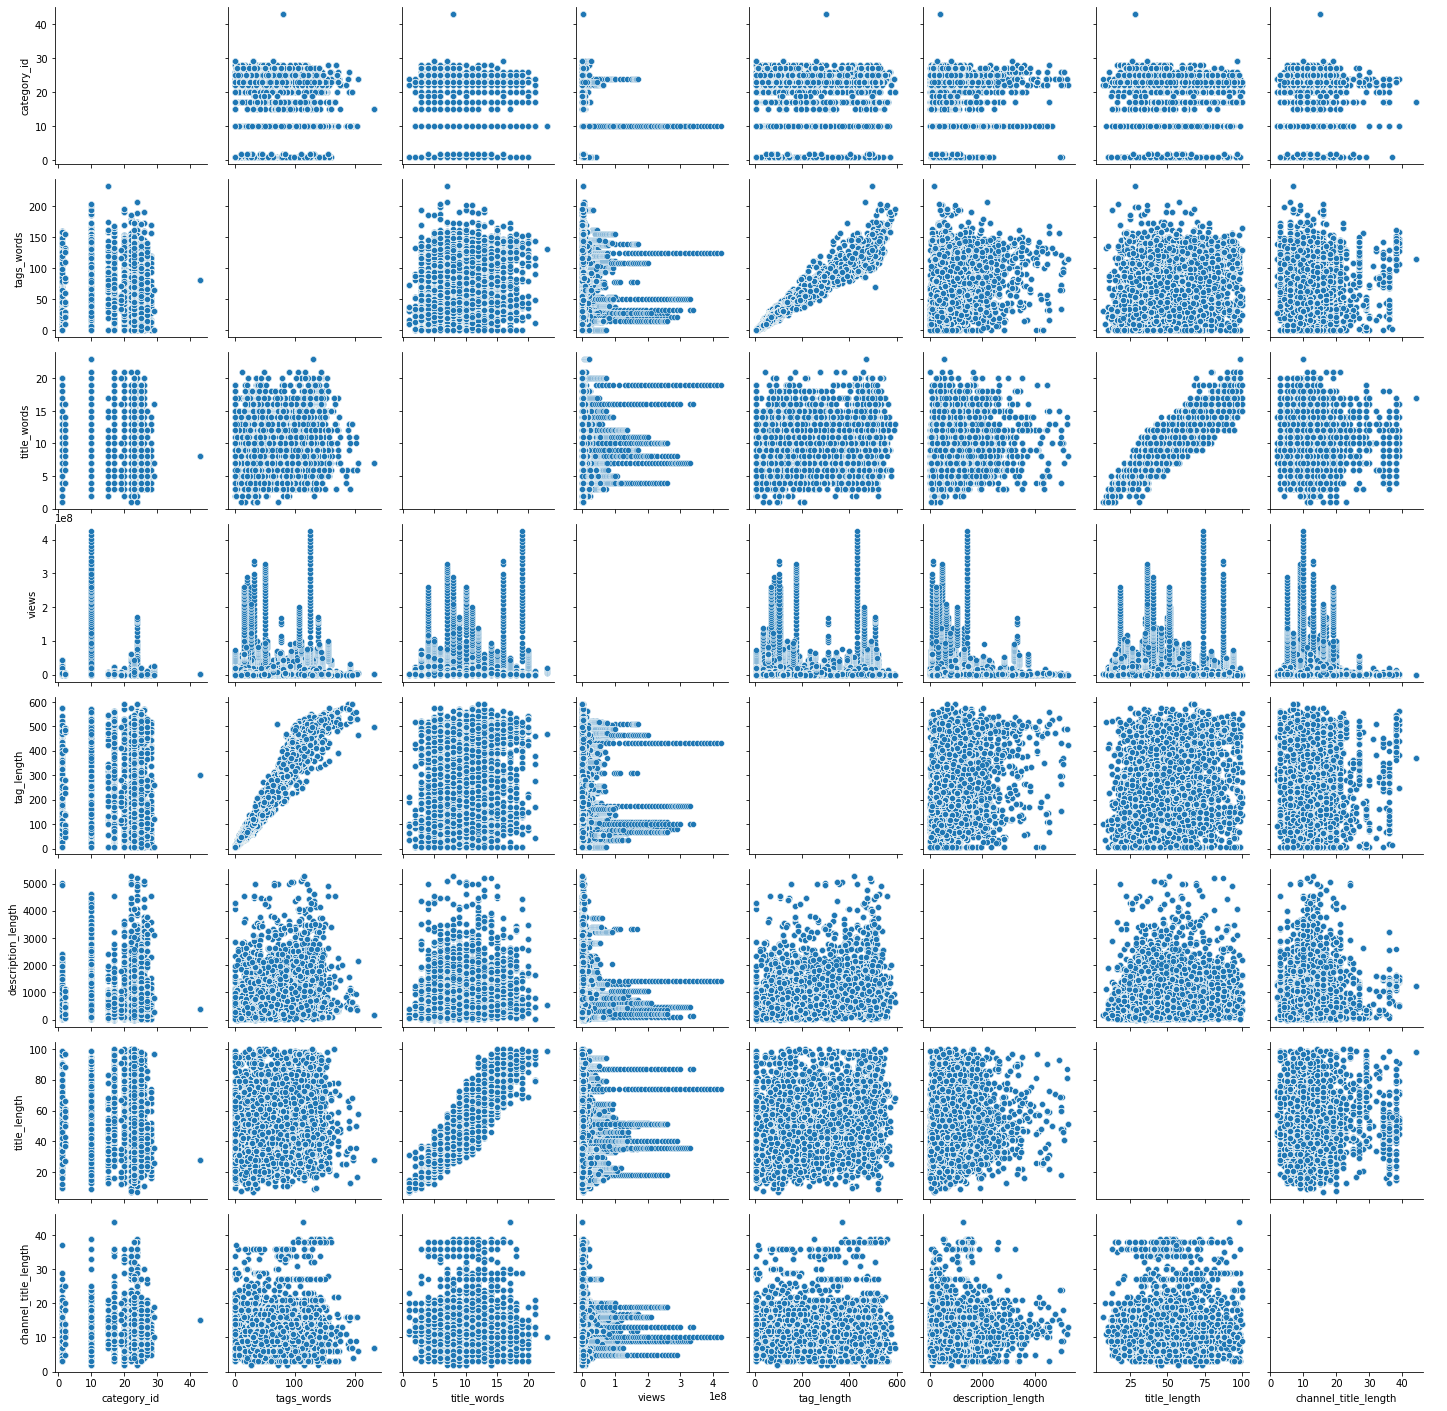

In [13]:
g = sns.PairGrid(newdf)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [14]:
X = newdf.drop(columns=["views"])
y = newdf['views']
# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()
X_cat


category_names_length Analysis_title Analysis_tags Analysis_descrp
video_id                                                                      
Jw1Y-zhQURU                    13        Neutral       Neutral        Positive
Jw1Y-zhQURU                    13        Neutral       Neutral        Positive
Jw1Y-zhQURU                    13        Neutral       Neutral        Positive
Jw1Y-zhQURU                    13        Neutral       Neutral        Positive
Jw1Y-zhQURU                    13        Neutral       Neutral        Positive
...                           ...            ...           ...             ...
j1oMVG1ZMlA                    21        Neutral       Neutral        Negative
j1oMVG1ZMlA                    21        Neutral       Neutral        Negative
j1oMVG1ZMlA                    21        Neutral       Neutral        Negative
j1oMVG1ZMlA                    21        Neutral       Neutral        Negative
j1oMVG1ZMlA                    21        Neutral       Neutral        Negative

[38017 rows x 4 columns]

In [15]:
X = newdf.drop(columns=["views"])
y = newdf['views']


# 1. defining categorical & ordinal columns
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

# 2. numerical pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"))

# 3. categorical pipeline
# 3.1 defining ordinal & onehot columns
ordinal_cols = X_cat.columns.get_indexer(["Analysis_title", "Analysis_tags", "Analysis_descrp"])
onehot_cols = X_cat.columns.get_indexer(["category_names"])

# 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = 20), ordinal_cols),
        ("cat_onehotenc", OneHotEncoder(sparse=False, handle_unknown="ignore"), onehot_cols)
    ]
)

# 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),
                                 categorical_encoder
                                )

pca = PCA()

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

pipeRDF = make_pipeline(preprocessor,
                     StandardScaler(),
                     pca,
                     RandomForestRegressor()
)
params = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "pca__n_components": [5, 15],
    "randomforestregressor__max_depth": [10, 20, 30],
    "randomforestregressor__min_samples_split": [2, 3, 4],
    "randomforestregressor__min_samples_leaf": [1, 2, 3]
}
randomf = GridSearchCV(pipeRDF,
                      params,
                      cv=4,
                      verbose=1)
randomf

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['category_id', 'tags_words', 'title_words', 'tag_length',
       'description_length', 'title_length', 'channel_title_length'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simp...
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'pca__n_components': [5, 15],
                         'randomforestregressor__max_depth': [10, 20, 30],
                         'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 3, 4]},
             verbose=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=8)#,  stratify=y)


randomf.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


/Users/weiling.p/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weiling.p/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weiling.p/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/weiling.p/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_tra

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['category_id', 'tags_words', 'title_words', 'tag_length',
       'description_length', 'title_length', 'channel_title_length'],
      dtype='object')),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('simp...
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median'],
                         'pca__n_components': [5, 15],
                         'randomforestregressor__max_depth': [10, 20, 30],
                         'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 3, 4]},
             verbose=1)

In [17]:
scores = {"Rdf" : randomf.best_score_}

scores

{'Rdf': 0.8242788171835047}

In [18]:
scores["Rdf"] = randomf.best_params_

scores

{'Rdf': {'columntransformer__num_pipe__simpleimputer__strategy': 'mean',
  'pca__n_components': 5,
  'randomforestregressor__max_depth': 30,
  'randomforestregressor__min_samples_leaf': 2,
  'randomforestregressor__min_samples_split': 3}}

In [19]:
randomf.predict(X_train) # Predictions

array([29362919.09291942,  6676738.00273716,   632099.78588649, ...,
         822436.86181446,  4407965.79611264,   619908.43566326])

In [20]:
y_train_pred = randomf.predict(X_train)

In [21]:
randomf.predict(X_test)

array([ 461035.87012293, 1364521.83228627, 4765471.86705911, ...,
        616731.07342464,  455358.78909076, 8862070.25939758])

In [22]:
randomf.score(X_train, y_train)

0.8429198520338352

In [23]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(randomf.predict(X_train)).reshape(-1, 1), y_train)

LinearRegression()

In [52]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(randomf.predict(X_test)).reshape(-1, 1)),#np.array(X_impute_test).reshape(-1, 1)), 
    'true_values':y_test
})
results.sort_values(by ='true_values',inplace =True)
# results.predictions=results.predictions.astype(str)
results


predictions  true_values
video_id                              
vPsic3dEndc -2.082539e+04       1228.0
NcVxrr_q3Hw -4.708604e+04       1577.0
au3S8F08v54  1.683274e+06       2254.0
NXin9D2Nc10 -3.338288e+04       2348.0
B1tEq5RU-Wo -1.908542e+04       2465.0
...                   ...          ...
9jI-z9QN6g8  1.479799e+08  289560679.0
9jI-z9QN6g8  1.259875e+08  337621571.0
_I_D_8Z4sJE  2.315635e+08  339629489.0
_I_D_8Z4sJE  2.315635e+08  372399338.0
_I_D_8Z4sJE  2.315635e+08  413586699.0

[7604 rows x 2 columns]

In [53]:
mod_res = {}
mod_res['1st_iter'] = {}

# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

1765773.924741413

In [56]:
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

67516609829020.72

In [57]:
# check our results with sklearn metrics
mod_res['1st_iter']['rmse'] = mean_squared_error(results.true_values, results.predictions)**0.5
mod_res['1st_iter']['rmse']

8216849.142403718

67516609829020.72